## 문제정의
- Kaggle titanic

## 데이터 수집

In [1]:
import pandas as pd
titanic = pd.read_csv("./data/titanic/train.csv",index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 데이터 전처리

### 문자형 데이터를 정수형으로 변환

In [2]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1,'C':2,'Q':3})
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':2})
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1.0


In [3]:
for i in range(891):
    if (pd.notnull(titanic['Cabin'].iloc[i])):
        titanic['Cabin'].iloc[i] = titanic['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
titanic['Cabin'][pd.notnull(titanic['Cabin'])].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [5]:
titanic['Cabin'] = titanic['Cabin'].map({'A':1,'B':1,'C':1,'D':1,'E':1,'F':1,'G':1,'T':1})

In [6]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,1.0,2.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1.0,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,1.0,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1.0


### 불필요한 컬럼 제거

In [7]:
del titanic['Name']
del titanic['Ticket']

### 결측지 확인

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    float64
 8   Embarked  889 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.6 KB


### 결측지 제거

#### 수치형 데이터간 상관 관계를 확인

In [9]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,NaN,0.108669
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,NaN,0.043835
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,NaN,0.118593
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,NaN,0.012186
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,NaN,-0.060606
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,NaN,-0.079320
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,NaN,0.063462
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,0.108669,0.043835,0.118593,0.012186,-0.060606,-0.079320,0.063462,NaN,1.000000


In [10]:
titanic[['Pclass','Sex','Age']].groupby(by = ['Pclass','Sex']).median()

Age
Pclass Sex      
1      1    40.0
       2    35.0
2      1    30.0
       2    28.0
3      1    25.0
       2    21.5

In [11]:
for i in range(891):
    if (pd.isnull(titanic.iloc[i]['Age'])):
        if (titanic.iloc[i]['Sex']==1):
            if(titanic.iloc[i]['Pclass']==1):
                titanic['Age'].iloc[i] = 40
            elif(titanic.iloc[i]['Pclass']==2):
                titanic['Age'].iloc[i] = 30
            else:
                titanic['Age'].iloc[i] = 25
        else:
            if(titanic.iloc[i]['Pclass']==1):
                titanic['Age'].iloc[i] = 35
            elif(titanic.iloc[i]['Pclass']==2):
                titanic['Age'].iloc[i] = 28
            else:
                titanic['Age'].iloc[i] = 21

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/3917771703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0


In [13]:
titanic['Embarked'][pd.isnull(titanic['Embarked'])]=1

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/2901830325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Embarked'][pd.isnull(titanic['Embarked'])]=1


In [14]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0.0,1.0
2,1,1,2,38.0,1,0,71.2833,1.0,2.0
3,1,3,2,26.0,0,0,7.9250,0.0,1.0
4,1,1,2,35.0,1,0,53.1000,1.0,1.0
5,0,3,1,35.0,0,0,8.0500,0.0,1.0
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000,0.0,1.0
888,1,1,2,19.0,0,0,30.0000,1.0,1.0
889,0,3,2,21.0,1,2,23.4500,0.0,1.0


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    float64
 8   Embarked  891 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 69.6 KB


### 이상치 확인

In [16]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.088855,0.523008,0.381594,32.204208,0.228956,1.361392
std,0.486592,0.836071,0.477990,13.318340,1.102743,0.806057,49.693429,0.420397,0.635673
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,1.000000,21.000000,0.000000,0.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,1.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,2.000000,36.000000,1.000000,0.000000,31.000000,0.000000,2.000000
max,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,1.000000,3.000000


### 이상치 제거

In [17]:
titanic['Age'] = titanic['Age']//1

In [18]:
for i in range(891):
    if (pd.isnull(titanic.iloc[i]['Cabin'])):
        if (titanic.iloc[i]['Pclass']==1):
            titanic['Cabin'].iloc[i]=3
        elif (titanic.iloc[i]['Pclass']==2):
            titanic['Cabin'].iloc[i]=5
        else:
            titanic['Cabin'].iloc[i]=6

In [19]:
titanic.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,0.543351,-0.060291,-0.035322,0.081629,0.257307,0.316912,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.414682,0.083081,0.018443,-0.549500,-0.725541,0.045702
Sex,0.543351,-0.131900,1.000000,-0.104584,0.114631,0.245489,0.182333,0.140391,0.116569
Age,-0.060291,-0.414682,-0.104584,1.000000,-0.250248,-0.175708,0.123250,0.277596,-0.059221
SibSp,-0.035322,0.083081,0.114631,-0.250248,1.000000,0.414838,0.159651,-0.040460,-0.059961
Parch,0.081629,0.018443,0.245489,-0.175708,0.414838,1.000000,0.216225,0.036987,-0.078665
Fare,0.257307,-0.549500,0.182333,0.123250,0.159651,0.216225,1.000000,0.482075,0.062142
Cabin,0.316912,-0.725541,0.140391,0.277596,-0.040460,0.036987,0.482075,1.000000,0.013774
Embarked,0.106811,0.045702,0.116569,-0.059221,-0.059961,-0.078665,0.062142,0.013774,1.000000


In [20]:
titanic['Fare'][titanic['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/637036922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']<8]=8


In [21]:
titanic['Fare'][titanic['Fare']>=200]=200

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/1609469039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']>=200]=200


## 데이터 셋 구성하기

### 문제와 정답으로 분리

In [22]:
X=titanic[['Pclass','Sex','Fare']]
y = titanic['Survived']
X,y

(             Pclass  Sex     Fare
 PassengerId                      
 1                 3    1   8.0000
 2                 1    2  71.2833
 3                 3    2   8.0000
 4                 1    2  53.1000
 5                 3    1   8.0500
 ...             ...  ...      ...
 887               2    1  13.0000
 888               1    2  30.0000
 889               3    2  23.4500
 890               1    1  30.0000
 891               3    1   8.0000
 
 [891 rows x 3 columns],
 PassengerId
 1      0
 2      1
 3      1
 4      1
 5      0
       ..
 887    0
 888    1
 889    0
 890    1
 891    0
 Name: Survived, Length: 891, dtype: int64)

In [23]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [24]:
XTrain, XTest, yTrain, yTest

(             Pclass  Sex      Fare
 PassengerId                       
 452               3    1   19.9667
 346               2    2   13.0000
 688               3    1   10.1708
 280               3    2   20.2500
 743               1    2  200.0000
 ...             ...  ...       ...
 535               3    2    8.6625
 585               3    1    8.7125
 494               1    1   49.5042
 528               1    1  200.0000
 169               1    1   25.9250
 
 [623 rows x 3 columns],
              Pclass  Sex     Fare
 PassengerId                      
 708               1    1  26.2875
 38                3    1   8.0500
 616               2    2  65.0000
 170               3    1  56.4958
 69                3    2   8.0000
 ...             ...  ...      ...
 843               1    2  31.0000
 672               1    1  52.0000
 697               3    1   8.0500
 43                3    1   8.0000
 397               3    2   8.0000
 
 [268 rows x 3 columns],
 PassengerId
 452    0


## 모델 선택 및 하이퍼 파라미터 튜닝

### 모델 선택

In [25]:
from sklearn.neighbors import KNeighborsClassifier

### 하이퍼 파라미터 튜닝

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameterGrid = {
    'n_neighbors' : range(1,51),
    'p' : [1,2],
    'weights' : ['uniform','distance']
}

In [28]:
grid = GridSearchCV(KNeighborsClassifier(), parameterGrid, cv = 5)

### 학습

In [29]:
grid.fit(XTrain,yTrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

### 평가

In [30]:
grid.best_score_

0.8137032258064515

In [31]:
grid.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

### 시각화

In [32]:
scoreList = []
for i in range(1,51):
    knn_model = KNeighborsClassifier(n_neighbors=i,p=1, weights='distance')
    knn_model.fit(XTrain,yTrain)
    scoreList.append([knn_model.score(XTrain,yTrain),knn_model.score(XTest,yTest)])
df_scoreList = pd.DataFrame(scoreList,columns=['TrainScore','TestScore'],index=range(1,51))
df_scoreList.index.name = "neighbors"
df_scoreList

,TrainScore,TestScore
neighbors,,
1,0.866774,0.753731
2,0.887640,0.772388
3,0.908507,0.805970
4,0.908507,0.805970
5,0.908507,0.809701
6,0.908507,0.809701
7,0.908507,0.817164
8,0.908507,0.817164
9,0.908507,0.817164


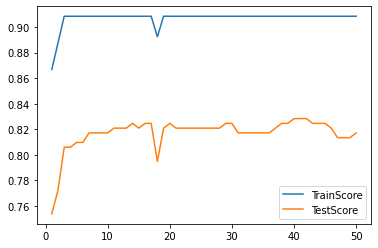

In [33]:
import matplotlib.pyplot as plt
plt.plot(df_scoreList, label = df_scoreList.columns)
plt.legend()
plt.show()

## TestData

### 불러오기

In [34]:
test = pd.read_csv("./data/titanic/test.csv",index_col="PassengerId")
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


### 전처리

#### 문자형 데이터 숫자형으로 변환

In [35]:
test['Embarked'] = test['Embarked'].map({'S':1,'C':2,'Q':3})
test['Sex'] = test['Sex'].map({'male':1,'female':2})

In [36]:
for i in range(418):
    if (pd.notnull(test['Cabin'].iloc[i])):
        test['Cabin'].iloc[i] = test['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [38]:
test['Cabin'] = test['Cabin'].map({'A':1,'B':1,'C':1,'D':1,'E':1,'F':1,'G':1,'T':1})

#### 불필요한 컬럼 제거

In [39]:
del test['Name']
del test['Ticket']

#### 결측지 확인

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     91 non-null     float64
 7   Embarked  418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


#### 결측지 제거

In [41]:
test[['Pclass','Sex','Age']].groupby(by = ['Pclass','Sex']).median()

Age
Pclass Sex      
1      1    42.0
       2    41.0
2      1    28.0
       2    24.0
3      1    24.0
       2    22.0

In [42]:
for i in range(418):
    if (pd.isnull(test.iloc[i]['Age'])):
        if (test.iloc[i]['Sex']==1):
            if(test.iloc[i]['Pclass']==1):
                test['Age'].iloc[i] = 42
            elif(test.iloc[i]['Pclass']==2):
                test['Age'].iloc[i] = 28
            else:
                test['Age'].iloc[i] = 24
        else:
            if(test.iloc[i]['Pclass']==1):
                test['Age'].iloc[i] = 41
            elif(test.iloc[i]['Pclass']==2):
                test['Age'].iloc[i] = 24
            else:
                test['Age'].iloc[i] = 22

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [43]:
test['Cabin'][pd.isnull(test['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/1678956821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cabin'][pd.isnull(test['Cabin'])]=0


In [44]:
test['Fare'][pd.isnull(test['Fare'])]=8.0000

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/1672224348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][pd.isnull(test['Fare'])]=8.0000


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Cabin     418 non-null    float64
 7   Embarked  418 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 29.4 KB


#### 이상치 확인

In [46]:
test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.363636,29.297847,0.447368,0.392344,35.561095,0.217703,1.464115
std,0.841838,0.481622,13.038856,0.896760,0.981429,55.856848,0.413179,0.685516
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,22.000000,0.000000,0.000000,7.895800,0.000000,1.000000
50%,3.000000,1.000000,25.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,2.000000,36.375000,1.000000,0.000000,31.471875,0.000000,2.000000
max,3.000000,2.000000,76.000000,8.000000,9.000000,512.329200,1.000000,3.000000


#### 이상치 제거

In [47]:
test['Age'] = test['Age']//1

In [48]:
test['Fare'][test['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/1087081510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']<8]=8


In [49]:
test['Fare'][test['Fare']>=200]=200

C:\Users\smhrd\AppData\Local\Temp/ipykernel_10984/981238444.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']>=200]=200


#### 테스트 셋 구성

In [50]:
test=test[['Pclass','Sex','Fare']]

## 예측

### 모델 생성

In [51]:
knn_model = KNeighborsClassifier(n_neighbors=21,p=1, weights='distance')

### 학습

In [52]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=21, p=1, weights='distance')

### 예측

In [53]:
result = knn_model.predict(test)
result

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### csv로 내보내기

In [54]:
dfResult = pd.DataFrame(result,columns=['result'])
dfResult

,result
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [55]:
dfResult.to_csv("./data/titanic/result.csv",encoding="euc-kr")